In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, Function, dsolve, Derivative, lambdify

In [86]:
def euler_method(f, y0, x0, xf, n, h):

  x = np.linspace(x0, xf, n+1)
  y = np.zeros(len(x))
  y[0] = y0
  for i in range(len(x) - 1):
    y[i+1] = y[i] + h * f(x[i], y[i])

  return x, y

In [87]:
def advanced_euler_method(f, y0, x0, xf, n, h):
  x = np.linspace(x0, xf, n+1)
  y = np.zeros(len(x))
  y[0] = y0
  for i in range(len(x) - 1):
    y[i+1] = y[i] + h * f(x[i] + 0.5*h, y[i] + 0.5*h*f(x[i], y[i]))
  return x, y

In [88]:
def runge_kutta_method(f, y0, x0, xf, n, h):
    x = np.linspace(x0, xf, n+1)

    y = np.zeros(len(x))
    y[0] = y0
    for i in range(len(x) - 1):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + 0.5 * h, y[i] + 0.5 * h * k1)
        k3 = f(x[i] + 0.5 * h, y[i] + 0.5 * h * k2)
        k4 = f(x[i] + h, y[i] + k3*h)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    return x, y


Eq(Derivative(y(x), x), -y(x))

Общее решение:


Eq(y(x), C1*exp(-x))

Частное решение:


Eq(y(x), 3*exp(-x))

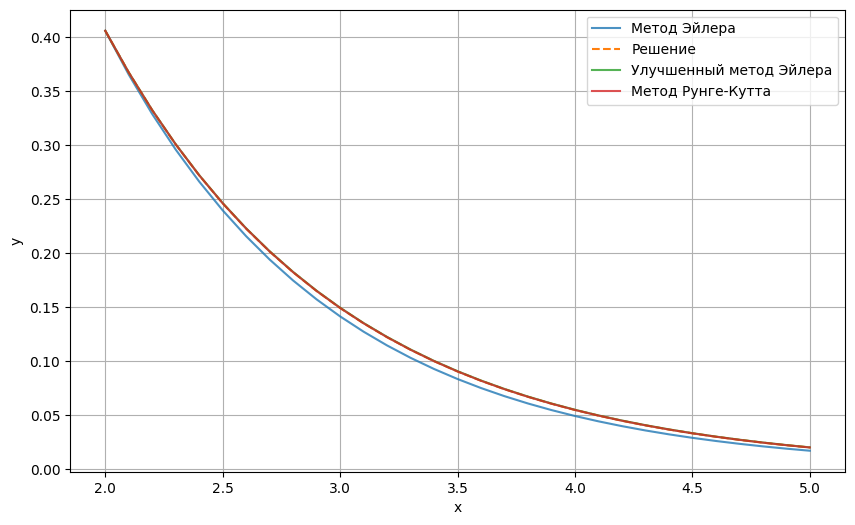

0.1
Погрешность метода Эйлера: 0.007795718755290448
Погрешность улучшенного метода Эйлера: 0.0002685905966549329
Погрешность метод Рунге-Кутта: 1.3529781817123165e-07


In [94]:
def f(x, y):
  return -y


x0 = 2.
xf = 5.
n = 30
h = (xf - x0) / n


# Аналитическое решение
x, C1 = symbols('x C1')
y = Function('y')(x)

ode = Eq(y.diff(x), f(x, y))
general_solution = dsolve(ode)
display(ode)
print("Общее решение:")
display(general_solution)

particular_solution = general_solution.subs(C1, 3)


print("Частное решение:")
display(particular_solution)




x_analytical = np.linspace(x0, xf, n+1)

analytical = lambdify(x, particular_solution.rhs, 'numpy')

y0 = analytical(x_analytical)[0]


x_euler, y_euler = euler_method(f, y0, x0, xf, n, h)

x_imp_euler, y_imp_euler = advanced_euler_method(f, y0, x0, xf, n, h)

x_runge, y_runge = runge_kutta_method(f, y0, x0, xf, n, h)

plt.figure(figsize=(10, 6))
plt.plot(x_euler, y_euler, label='Метод Эйлера', linestyle='-', alpha=0.8)
plt.plot(x_analytical, analytical(x_analytical), label='Решение', linestyle='--')
plt.plot(x_imp_euler, y_imp_euler, label='Улучшенный метод Эйлера', linestyle='-', alpha=0.8)
plt.plot(x_runge, y_runge, label='Метод Рунге-Кутта', linestyle='-', alpha=0.8)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

y_a = analytical(x_analytical)
print(h)
print(f'Погрешность метода Эйлера: {np.max(np.abs(y_a - y_euler))}')
print(f'Погрешность улучшенного метода Эйлера: {np.max(np.abs(y_a - y_imp_euler))}')
print(f'Погрешность метод Рунге-Кутта: {np.max(np.abs(y_a - y_runge))}')